# **MNIST**
 handwritten digits dataset

In [1]:
import torch
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
# Example of MINIST
# 28 x 28 image
# 1 channel gray image
# 0 ~ 9 digits
# for X, y in data_loader:
#   X = X.view(-1, 28 * 28)

#torchvision



*   popular datasets
*   model architectures
*   common image transformations for computer vision



In [3]:
# GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(1)
torch.manual_seed(1)
if device == 'cuda':
  torch.cuda.manual_seed_all(1)

In [4]:
# parameters
training_epochs = 15
batch_size = 100          # 60000 = 600 * 100

In [ ]:
# MINIST dataset
mnist_train = dsets.MNIST(root='MINIST_data/',                # 데이터셋의 경로
                            train=True,                       # True 로 할 시 MINIST 의 Train_set 을 불러오고 False 로 할 시 Test_set 을 불러온다.
                            transform=transforms.ToTensor(),  # MINIST image 를 불러올 때 어떤 transform 을 적용해서 불러올건지 정하는 인자.
                                                              # ToTensor() 가 general_image: (0~255)(height,wide,channel) -> pytorch image:(0~1)(channel,height,wide) 의 기능을 수행한다.
                            download=True)                    # 다운을 할지 말지 정하는 인자

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [6]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,      # 어떤 dataset 을 load 할건지
                                          batch_size=batch_size,
                                          shuffle=True,             # 무작위로 load 할
                                          drop_last=True)           # batch_size 에 맞게 load 할 때 숫자가 맞지 않아서 남는 데이터를 어떻게 처리할지 (True로 할 시에 버린다.)

In [7]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)             # MNIST 가 0~9 의 label 값을 가지므로

In [8]:
# define cost/loss & optimizer with Softmax
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(linear.parameters(), lr=0.1)               # linearparameters(): weight, bias

# Epoch
*  one epoch equals one forward/backward pass of all the training examples

#Batch size
*  the number of training exaples in one forward/backward pass

#Iteration
*   number of passes, each pass using batch

**Example**: 만약 1000 개의 training exaples 이 있고 batch size 가 500 이라면 2 개의 batch 가 있고, 2 iterations 을 학습에 사용하면, 1 epoch 이 완료됐다는 의미

In [9]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.533756435
Epoch: 0002 cost = 0.359071314
Epoch: 0003 cost = 0.330853939
Epoch: 0004 cost = 0.316269368
Epoch: 0005 cost = 0.306897253
Epoch: 0006 cost = 0.299754918
Epoch: 0007 cost = 0.295043975
Epoch: 0008 cost = 0.290703624
Epoch: 0009 cost = 0.287395418
Epoch: 0010 cost = 0.284370959
Epoch: 0011 cost = 0.281917334
Epoch: 0012 cost = 0.279720336
Epoch: 0013 cost = 0.277781814
Epoch: 0014 cost = 0.275830269
Epoch: 0015 cost = 0.274402380
Learning finished


In [10]:
# Test the model using test sets
with torch.no_grad():             # gradient 계산 X
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8837999701499939


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Label:  4
Prediction:  4


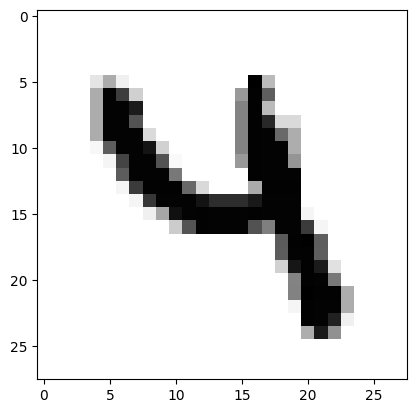

In [11]:
# Visuzlization
# Get one and predict
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()